,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo
...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


Total de funcionarios é de: R$ 2,717,493.22


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area,Salario Total
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações,38208.04
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística,9915.36
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo,28195.32
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo,36962.66
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo,9568.36
...,...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística,19104.18
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial,7875.92
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo,42616.32
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial,9605.88


Faturamento total é de: R$ 5,519,160.00
Percentual de funcionarios que fecharam contrato: 86.84%
Contratos fechados por área: Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64
Funcionarios por área: Area
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: count, dtype: int64
Ticket médio dos contratos fechados: R$ 2,502.56


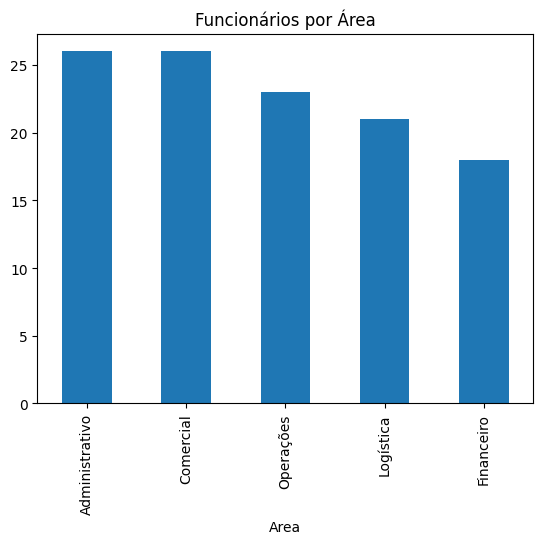

In [ ]:
import pandas as pd


## Ler arquivo CSV com separador ponto e virgula e decimal na planilha usa virgula
funcionarios_df = pd.read_csv("CadastroFuncionarios.csv",  sep=";", decimal=",")
clientes_df = pd.read_csv("CadastroClientes.csv",  sep=";", decimal=",")
servicos_df = pd.read_excel("ServicosPrestados.xlsx")
display(funcionarios_df)
display(clientes_df)
display(servicos_df)

## Removendo dados que nao vou utilizar ( Estados Civil e Cargo da planilha funcionarios)
funcionarios_df = funcionarios_df.drop(columns=["Estado Civil", "Cargo"])

## Criar coluna nova com soma de outras colunas

funcionarios_df["Salario Total"] = funcionarios_df["Salario Base"] + funcionarios_df["Impostos"] + funcionarios_df["Beneficios"] + funcionarios_df["VT"] + funcionarios_df["VR"]
total_salarios = funcionarios_df["Salario Total"].sum()
print(f"Total de funcionarios é de: R$ {total_salarios:,.2f}")
display(funcionarios_df)

## Faturamento total dos servicos prestados (mesclando duas tabelas)
faturamentos_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']])
faturamentos_df = faturamentos_df["Tempo Total de Contrato (Meses)"] * faturamentos_df["Valor Contrato Mensal"]
print(f"Faturamento total é de: R$ {faturamentos_df.sum():,.2f}")

## % de funcionarios que fecharam contrato nunique = conta valores unicos "Remove duplicados"

contratos_fechados = servicos_df['ID Funcionário'].nunique()
total_funcionarios = funcionarios_df['ID Funcionário'].nunique()
percentual_contratos_fechados = (contratos_fechados / total_funcionarios) * 100
print(f"Percentual de funcionarios que fecharam contrato: {percentual_contratos_fechados:.2f}%")

## Contratos fechados por area

contratos_area = servicos_df.merge(funcionarios_df[['ID Funcionário', 'Area']], on='ID Funcionário')
contratos_area_qtd = contratos_area["Area"].value_counts()
print(f"Contratos fechados por área: {contratos_area_qtd}")

## Funcionarios por area

funcionarios_area = funcionarios_df["Area"].value_counts()
print(f"Funcionarios por área: {funcionarios_area}")
## Exibir em grafico
funcionarios_area.plot(kind='bar', title='Funcionários por Área')

## Ticket Medio .mean() calcular a media dos valores

ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print(f"Ticket médio dos contratos fechados: R$ {ticket_medio:,.2f}")


